# Predicting Model Expenses 

## Problem Statement 

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?


Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


Importing libraries 

In [25]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
  
import warnings
warnings.filterwarnings('ignore')

In [11]:
medical_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [12]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [13]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Everything except sex, smoker and region are numbers. there are no missing values so we don't have to do any sort of data refining or correction 

In [14]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# Exploratory Analysis and Visualization 

In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

In [20]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [26]:
!pip install plotly 

In [27]:
import plotly.express as px

In [28]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

## BMI

In [29]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

## Charges

In [30]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Visualization of the distribution of medical cahrges with sex and region 

In [31]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(medical_df,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

In the distribution of charges over gender we see that males are substancially charged because by male behaviour typically males are to take up more risky taks this keeps thems in danger more than their counterpart.It is also evident that males of U.S are more inclined to get health insuarrance then female.
And, in second distribution we see that southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

## Smoker 


In [33]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [34]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

20% of the customers have reported that they have smoked. more common in males. only true for the given data set.

## Visualization of Sex, Region and Children 

In [35]:
fig = px.histogram(medical_df,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

## Age and Charges 

In [36]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **Insight**: What other inferences can we draw from the above chart?
>
> even if you have ailment or not people who are smokers for majority of the cases incurred more charges in medical bills than non-smokers and this difference is not small it is in the range of 5000 to 1000 $



## BMI and Charges 


In [37]:

fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## Visualizing how the cahrges column is realted to children sex region and smoker 



In [38]:
px.violin(medical_df,x = 'children',y = 'charges')


<AxesSubplot:xlabel='sex', ylabel='charges'>

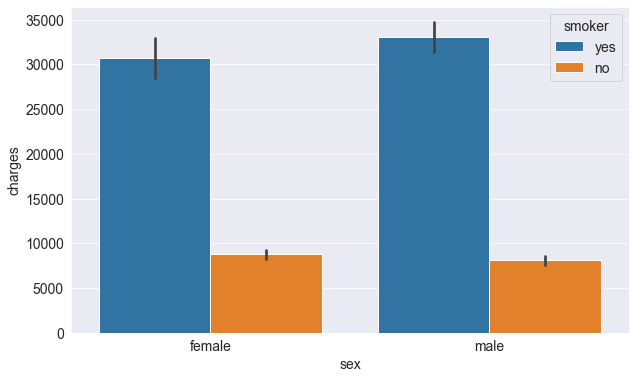

In [39]:
sns.barplot(data = medical_df,x = 'sex',y = 'charges',hue = "smoker")


In [40]:
px.histogram(medical_df,x='sex',y = 'charges',color = 'region')


## Correlation 

In [41]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [42]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [43]:
medical_df.children.corr(medical_df.charges)

0.06799822684790487

In [44]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [45]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

### Correlation matrix using a heatmap 


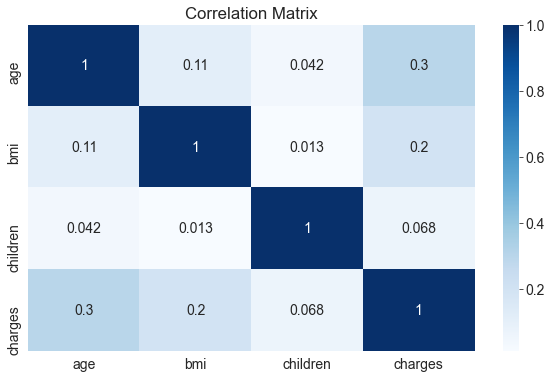

In [46]:
sns.heatmap(medical_df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a single feature 

In [47]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

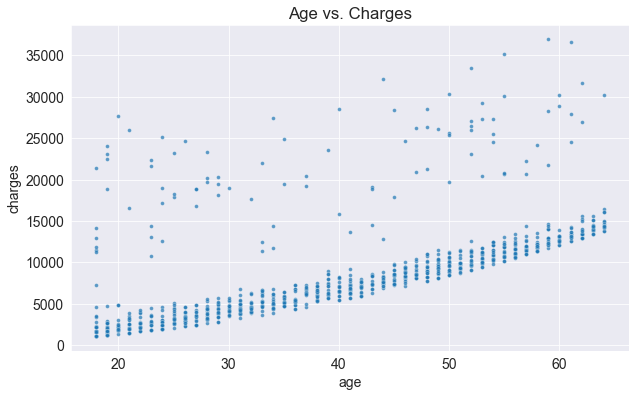

In [48]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [49]:
def estimate_charges(age, w, b):
    return w * age + b

In [50]:
w = 50
b = 100
estimate_charges(30,w,b)


1600

In [51]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [52]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

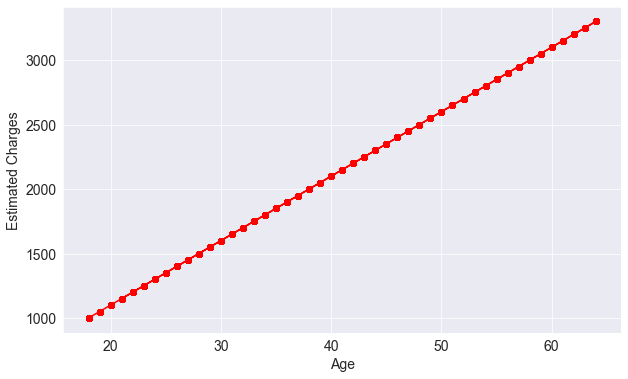

In [53]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

## Now to see how well the line fits our data 

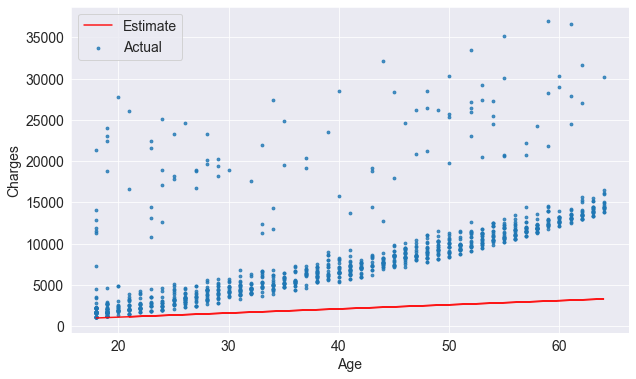

In [54]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

### moving the line around by changing the value of w and b 

In [56]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

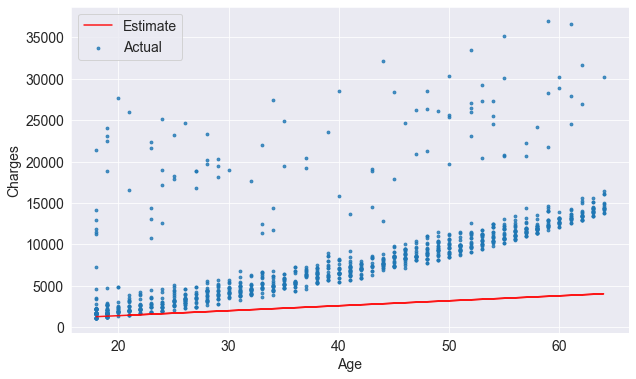

In [57]:
try_parameters(60, 200)

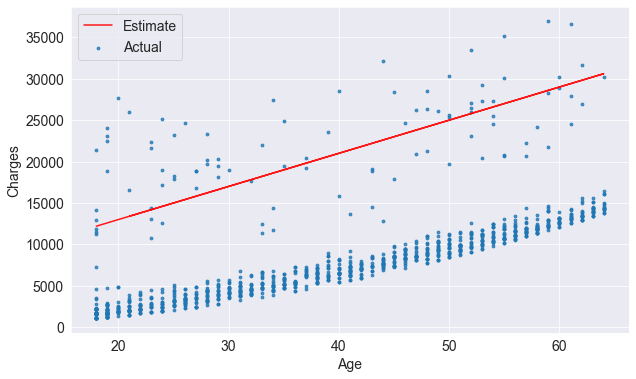

In [58]:
try_parameters(400, 5000)

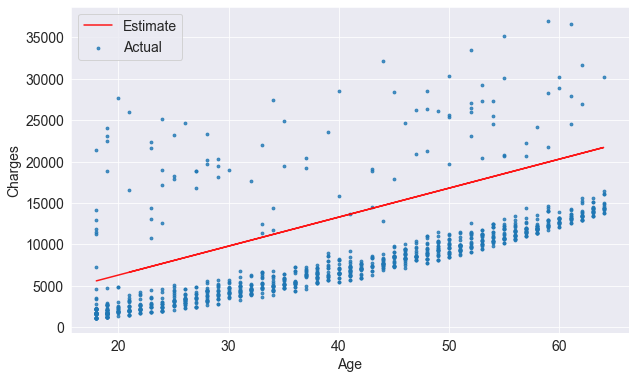

In [59]:
try_parameters(350,-700)

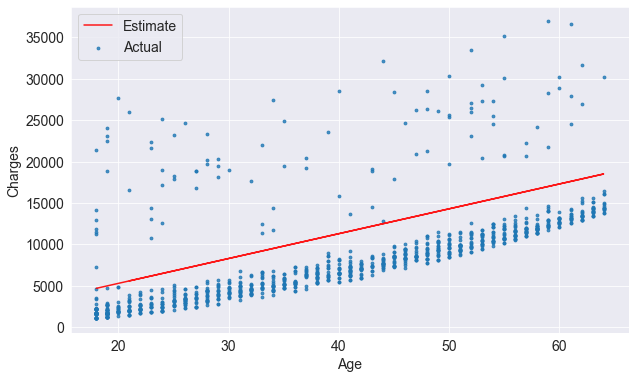

In [60]:
try_parameters(300,-700)

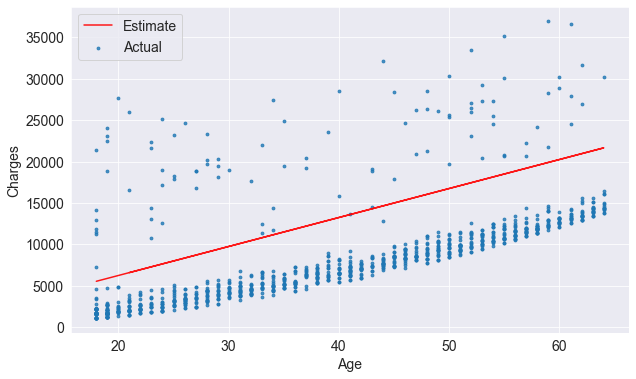

In [61]:
try_parameters(350,-750)

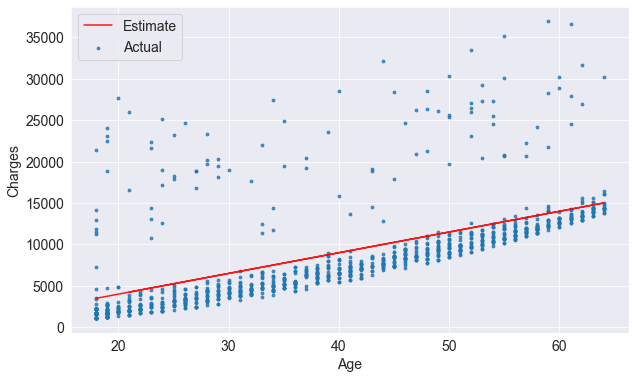

In [62]:
try_parameters(250,-1000)

In [63]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

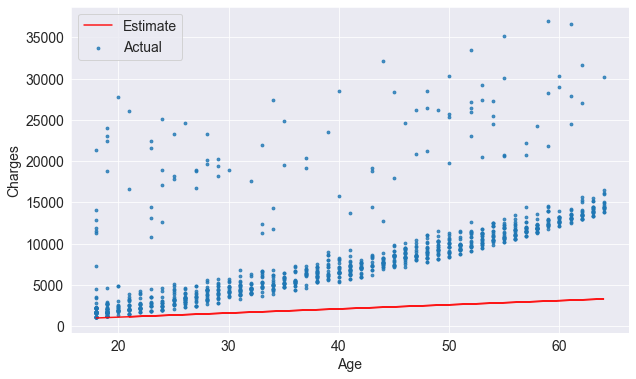

In [64]:
w = 50
b = 100

try_parameters(w, b)

In [65]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [66]:
rmse(targets, predicted)

8461.949562575488

### Lower the boss better the model 

In [67]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


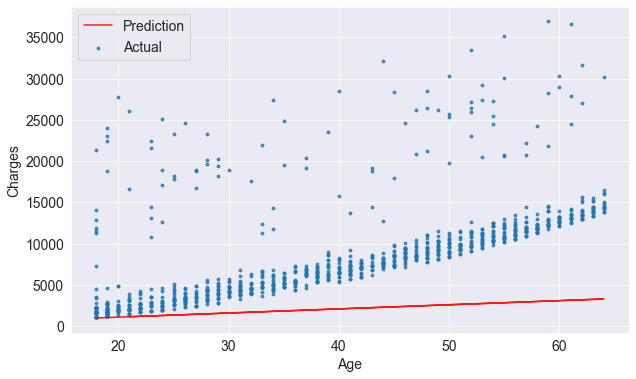

In [68]:
try_parameters(50, 100)

RMSE Loss:  4686.972905878285


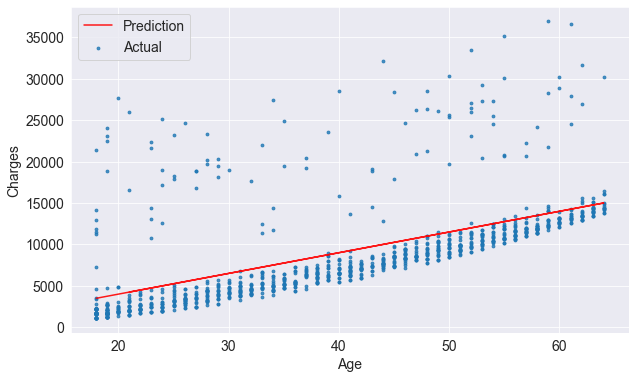

In [69]:
try_parameters(250,-1000)

RMSE Loss:  4673.637609506454


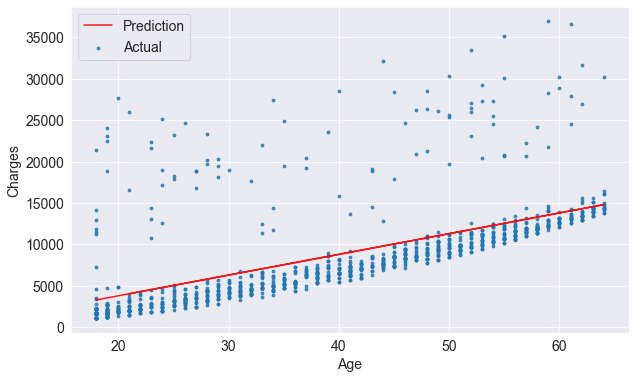

In [70]:
try_parameters(250,-1200)

RMSE Loss:  4664.426039892947


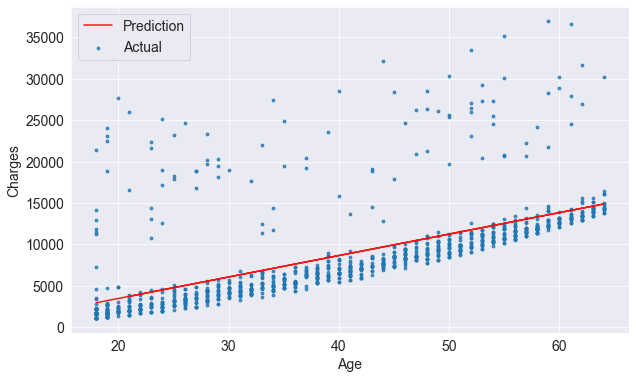

In [71]:
try_parameters(259,-1700)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [73]:
model = LinearRegression()

In [74]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [75]:
model.fit(inputs, targets)

LinearRegression()

In [77]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [78]:
rmse(targets, predictions)

4662.505766636391

In [79]:
model.coef_

array([267.24891283])

In [80]:
model.intercept_

-2091.4205565650827

In [81]:
model1 = SGDRegressor()

In [82]:
model1.fit(inputs,targets)

SGDRegressor()

In [83]:
predictions = model1.predict(inputs)
rmse(targets, predictions)


5366.510892407632

In [84]:
## Model creation for smokers and dataset 

smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

In [85]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [86]:
model.fit(inputs,targets)

LinearRegression()

In [87]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)


RMSE:


10711.00334810241

## Machine Learning 

In [88]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


In [89]:
## Linear Regression using multiple features 

# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


In [90]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

In [91]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [92]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

### Training a linear regression model to estimate charges using BMI along 

In [93]:
inputs,targets = non_smoker_df[['bmi']],non_smoker_df['charges']

In [94]:
model = LinearRegression().fit(inputs, targets)

predictions=model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 5969.772531913287


In [95]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

In [96]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [97]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


In [98]:
inputs,targets = smoker_df[['age','children','bmi']],smoker_df['charges']

In [99]:
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

loss = rmse(targets,prediction)
print('Loss',loss)

Loss 5718.202480524153


In [100]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.31790112597


In [101]:
px.scatter(medical_df,x="age",y="charges",color='smoker')

### Binary Categories 

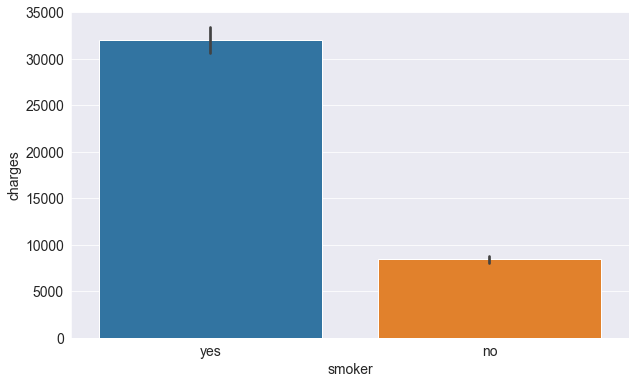

In [103]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [104]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [105]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [106]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


<AxesSubplot:xlabel='sex', ylabel='charges'>

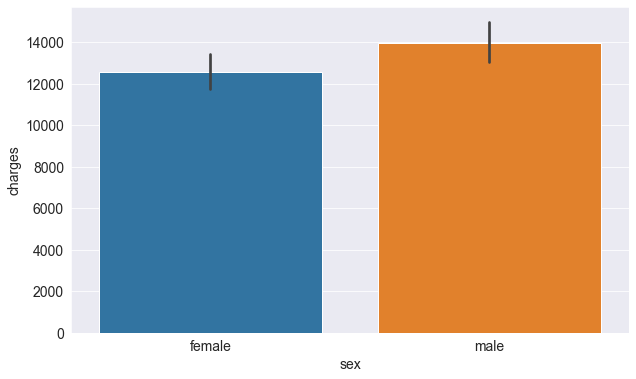

In [107]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [108]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes)

medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [109]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

### One hot encoding 

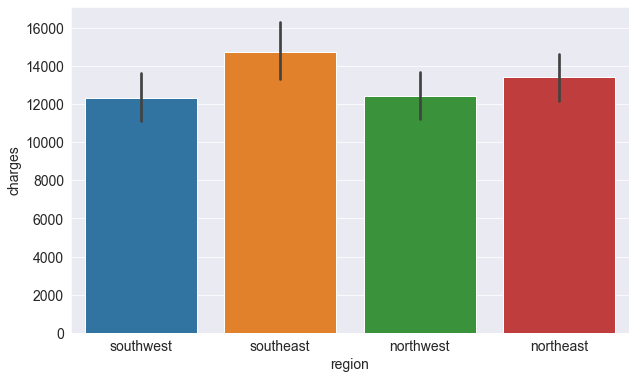

In [110]:
sns.barplot(data=medical_df, x='region', y='charges');

In [111]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [112]:
enc.transform([['northeast']]).toarray()

array([[1., 0., 0., 0.]])

In [113]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [114]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [115]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [116]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


In [117]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes) 

#one-hot coding for smoker_df
enc.fit(smoker_df[['region']])
one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model_smoker = LinearRegression().fit(inputs, targets)

# Generate predictions
prediction = model_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, prediction)
print('Loss:', loss)

Loss: 5668.467882112154


In [118]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes) 

#one-hot coding for smoker_df
enc.fit(non_smoker_df[['region']])
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model_non_smoker= LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_non_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795491


In [119]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [120]:
model.intercept_

-12525.547811195465

In [121]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_ , model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

In [123]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])


StandardScaler()

In [124]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [125]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [126]:
medical_df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

In [127]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [128]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [129]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


In [130]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

In [131]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]
scaler.transform([[28,30,2]])

array([[-0.79795355, -0.10882659,  0.75107928]])

In [132]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

### Test set 

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=0)

In [135]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5641.62655885019


In [136]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6140.157418880165
